In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/Data_Train.csv")  # Importing the data
df_test = pd.read_csv("Desktop/test_set.csv")  # Importing the data

In [3]:
df.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL ? BOM ? COK,04:55,19:15,14h 20m,1 stop,No info


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [9]:
df.shape

(10683, 11)

In [10]:
df_test.shape

(2671, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [13]:
df.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [15]:
df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [16]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [17]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Data pre-processing

In [18]:
df[['Day', 'Month','Year']] = df['Date_of_Journey'].str.split('/', expand=True)
df = df.drop(['Date_of_Journey'],axis=1)
df_test[['Day', 'Month','Year']] = df_test['Date_of_Journey'].str.split('/', expand=True)
df_test = df_test.drop(['Date_of_Journey'],axis=1)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [20]:
df_test.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,06,2019
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,27,03,2019
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,03,2019
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,6,03,2019
2670,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,04:55,19:15,14h 20m,1 stop,No info,15,06,2019


In [21]:
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Day                  14
Month                 4
Year                  1
dtype: int64

In [22]:
df = df.drop(['Year'],axis=1)
df_test = df_test.drop(['Year'],axis=1)

In [23]:
df['Dep_time'] = df['Dep_Time'].astype(str).str[0:2]
df['Ari_time'] = df['Arrival_Time'].astype(str).str[0:2]

df_test['Dep_time'] = df_test['Dep_Time'].astype(str).str[0:2]
df_test['Ari_time'] = df_test['Arrival_Time'].astype(str).str[0:2]


In [24]:
df['Dep_time'] = df['Dep_time'].astype(int)
df['Ari_time'] = df['Ari_time'].astype(int)

df_test['Dep_time'] = df_test['Dep_time'].astype(int)
df_test['Ari_time'] = df_test['Ari_time'].astype(int)

In [25]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                object
Month              object
Dep_time            int32
Ari_time            int32
dtype: object

In [26]:
df['Departure'] = df.Dep_time.apply(lambda date: "Early Morning" if 0 <= date <= 6 else "Late Morning" if 7 <= date <= 12  else "Early Evening" if 13 <= date <= 18 else "Late Evening")
df['Arrival'] = df.Ari_time.apply(lambda date: "Early Morning" if 0 <= date <= 6 else "Late Morning" if 7 <= date <= 12  else "Early Evening" if 13 <= date <= 18 else "Late Evening")

In [27]:
df_test['Departure'] = df_test.Dep_time.apply(lambda date: "Early Morning" if 0 <= date <= 6 else "Late Morning" if 7 <= date <= 12  else "Early Evening" if 13 <= date <= 18 else "Late Evening")
df_test['Arrival'] = df_test.Ari_time.apply(lambda date: "Early Morning" if 0 <= date <= 6 else "Late Morning" if 7 <= date <= 12  else "Early Evening" if 13 <= date <= 18 else "Late Evening")


In [28]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Dep_time,Ari_time,Departure,Arrival
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,17,4,Early Evening,Early Morning
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,05,6,10,Early Morning,Late Morning
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,19,19,Late Evening,Late Evening
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,05,8,21,Late Morning,Late Evening
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,23,2,Late Evening,Early Morning


In [29]:
df_test = df_test.drop(['Dep_Time','Dep_time','Arrival_Time','Ari_time'],axis=1)
df = df.drop(['Dep_Time','Dep_time','Arrival_Time','Ari_time'],axis=1)

In [30]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Departure,Arrival
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,06,Early Evening,Early Morning
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,05,Early Morning,Late Morning
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,05,Late Evening,Late Evening
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,05,Late Morning,Late Evening
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,06,Late Evening,Early Morning


In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Departure,Arrival
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,03,Late Evening,Early Morning
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,05,Early Morning,Early Evening
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,06,Late Morning,Early Morning
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,05,Early Evening,Late Evening
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,01,03,Early Evening,Late Evening


In [32]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                object
Month              object
Departure          object
Arrival            object
dtype: object

In [33]:
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Day                  14
Month                 4
Departure             4
Arrival               4
dtype: int64

In [34]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Departure,Arrival
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,03,Late Evening,Early Morning
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,05,Early Morning,Early Evening
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,06,Late Morning,Early Morning
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,05,Early Evening,Late Evening
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,01,03,Early Evening,Late Evening


In [35]:
df['Duration_minutes'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(int)
df_test['Duration_minutes'] = (pd.to_timedelta(df_test['Duration']).dt.seconds // 60).astype(int)
df_test = df_test.drop(['Duration'],axis=1)
df = df.drop(['Duration'],axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Departure,Arrival,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,03,Late Evening,Early Morning,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,05,Early Morning,Early Evening,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,06,Late Morning,Early Morning,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,05,Early Evening,Late Evening,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,01,03,Early Evening,Late Evening,285


In [36]:
df['Month'] = df['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
df_test['Month'] = df_test['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

Converting the numerical month to name of the month.

In [37]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Departure', 'Arrival',
       'Duration_minutes'],
      dtype='object')

In [38]:
df['Total stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1,'2 stops':2,'3 stops':3,'4 stops':4}) 
df_test['Total stops'] = df_test['Total_Stops'].map({'non-stop': 0, '1 stop': 1,'2 stops':2,'3 stops':3,'4 stops':4})

In [39]:
df_test = df_test.drop(['Total_Stops'],axis=1)
df = df.drop(['Total_Stops'],axis=1)

In [40]:
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Departure,Arrival,Duration_minutes,Total stops
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,3897,24,Mar,Late Evening,Early Morning,170,0.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,7662,1,May,Early Morning,Early Evening,445,2.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,13882,9,Jun,Late Morning,Early Morning,1140,2.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,6218,12,May,Early Evening,Late Evening,325,1.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,13302,01,Mar,Early Evening,Late Evening,285,1.0


In [41]:
df_test.head()

,Airline,Source,Destination,Route,Additional_Info,Day,Month,Departure,Arrival,Duration_minutes,Total stops
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,No info,6,Jun,Early Evening,Early Morning,655,1
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,No info,12,May,Early Morning,Late Morning,240,1
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,In-flight meal not included,21,May,Late Evening,Late Evening,1425,1
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,No info,21,May,Late Morning,Late Evening,780,1
4,Air Asia,Banglore,Delhi,BLR ? DEL,No info,24,Jun,Late Evening,Early Morning,170,0


In [42]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [43]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

Index(['Price', 'Duration_minutes', 'Total stops'], dtype='object')


In [44]:
categorical_features = df.select_dtypes(include=['object']).copy()
print(numerical_features.columns)

Index(['Price', 'Duration_minutes', 'Total stops'], dtype='object')


### Performing EDA

<Figure size 432x288 with 0 Axes>

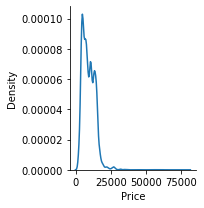

<Figure size 432x288 with 0 Axes>

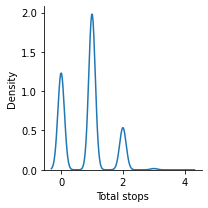

In [45]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

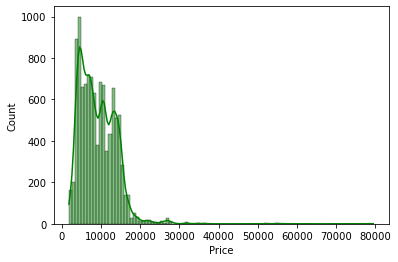

In [46]:
sns.histplot(df['Price'],bins = 100 , kde = True, color = 'green') # Most of the flight prices range from 2000-20000

<AxesSubplot:>

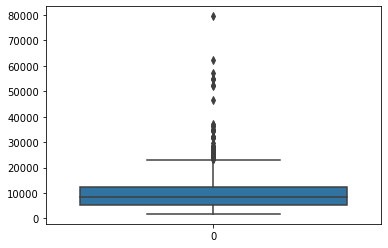

In [47]:
sns.boxplot(data=df['Price'])

<AxesSubplot:>

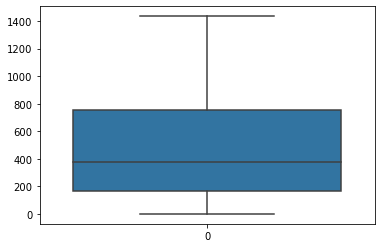

In [48]:
sns.boxplot(data=df['Duration_minutes'])

<AxesSubplot:>

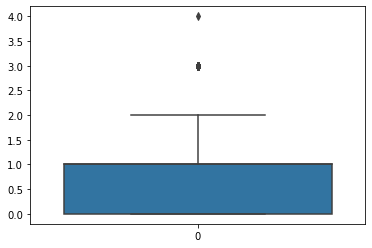

In [49]:
sns.boxplot(data=df['Total stops'])

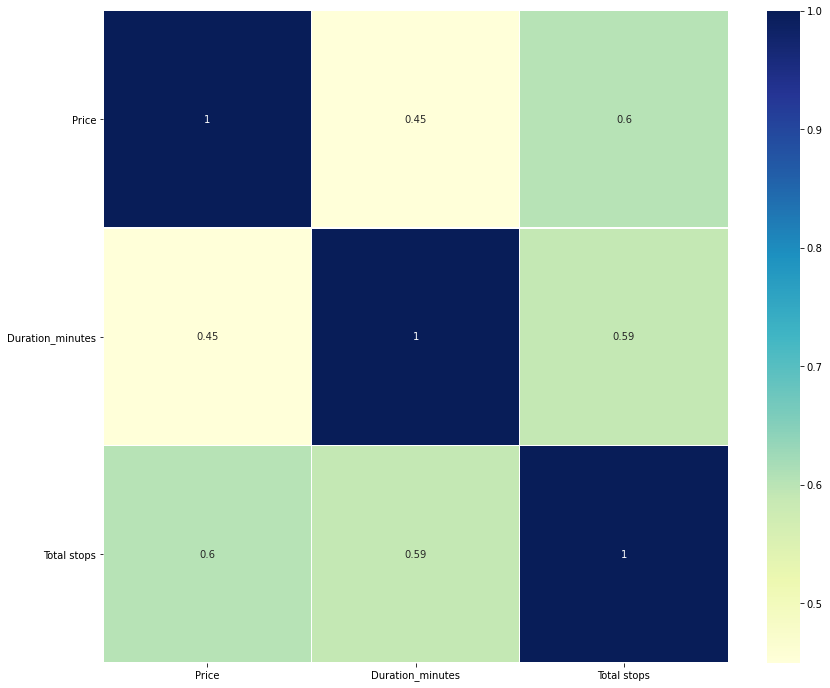

In [50]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

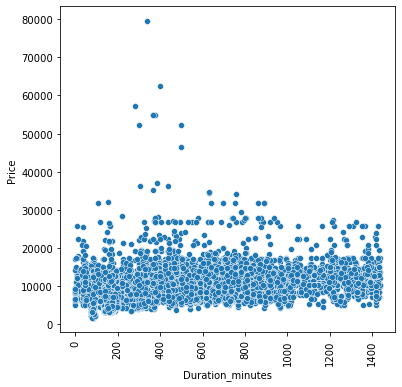

In [51]:
f,ax1 = plt.subplots(figsize = (6,6))
sns.scatterplot(y = df.Price, x = df['Duration_minutes'])
plt.xticks(rotation = 90)
plt.show()

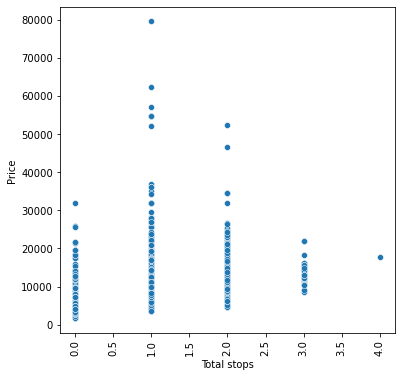

In [52]:
f,ax1 = plt.subplots(figsize = (6,6))
sns.scatterplot(y = df.Price, x = df['Total stops'])
plt.xticks(rotation = 90)
plt.show()

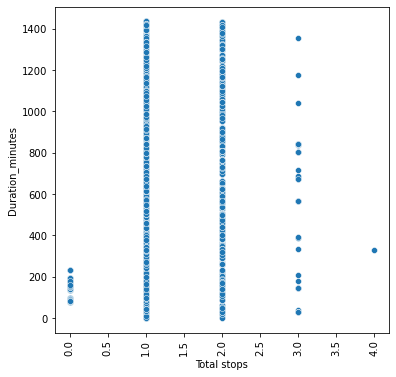

In [53]:
f,ax1 = plt.subplots(figsize = (6,6))
sns.scatterplot(y = df.Duration_minutes, x = df['Total stops'])
plt.xticks(rotation = 90)
plt.show()

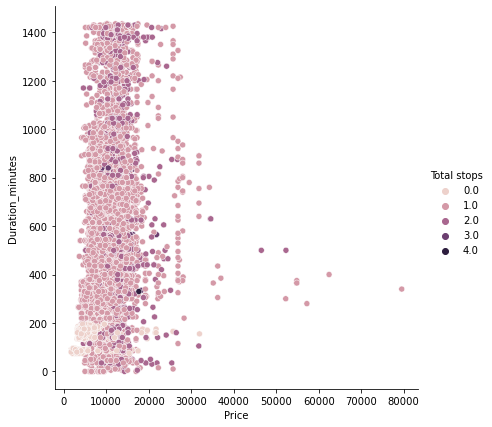

In [54]:
sns.pairplot(data = df, x_vars=['Price'], y_vars=['Duration_minutes'], kind = 'scatter', diag_kind= None, height = 6, hue = 'Total stops')

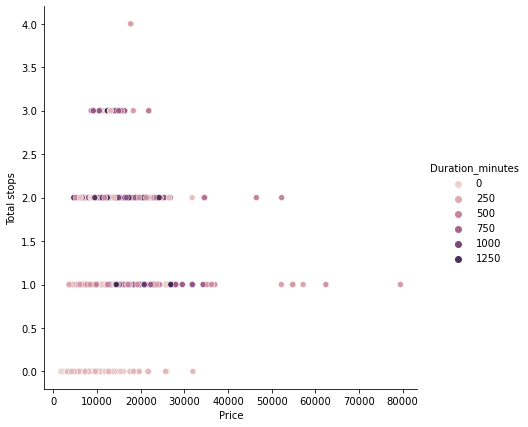

In [55]:
sns.pairplot(data = df, x_vars=['Price'], y_vars=['Total stops'], kind = 'scatter', diag_kind= None, height = 6, hue = 'Duration_minutes')

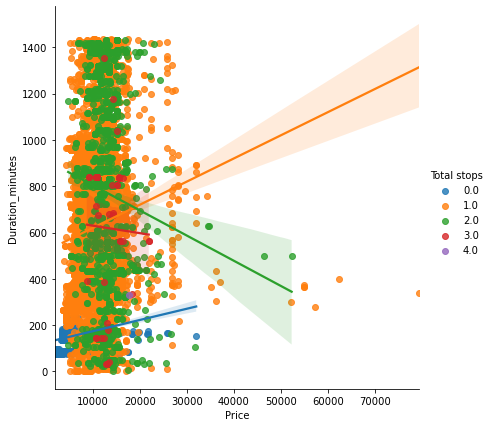

In [56]:
sns.pairplot(data = df, x_vars=['Price'], y_vars=['Duration_minutes'], kind = 'reg', diag_kind= None, height = 6, hue = 'Total stops')

In [57]:
categorical_features = categorical_features.drop(['Route'], axis = 1)

In [58]:
categorical_features

,Airline,Source,Destination,Additional_Info,Day,Month,Departure,Arrival
0,IndiGo,Banglore,New Delhi,No info,24,Mar,Late Evening,Early Morning
1,Air India,Kolkata,Banglore,No info,1,May,Early Morning,Early Evening
2,Jet Airways,Delhi,Cochin,No info,9,Jun,Late Morning,Early Morning
3,IndiGo,Kolkata,Banglore,No info,12,May,Early Evening,Late Evening
4,IndiGo,Banglore,New Delhi,No info,01,Mar,Early Evening,Late Evening
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,9,Apr,Late Evening,Late Evening
10679,Air India,Kolkata,Banglore,No info,27,Apr,Late Evening,Late Evening
10680,Jet Airways,Banglore,Delhi,No info,27,Apr,Late Morning,Late Morning
10681,Vistara,Banglore,New Delhi,No info,01,Mar,Late Morning,Early Evening


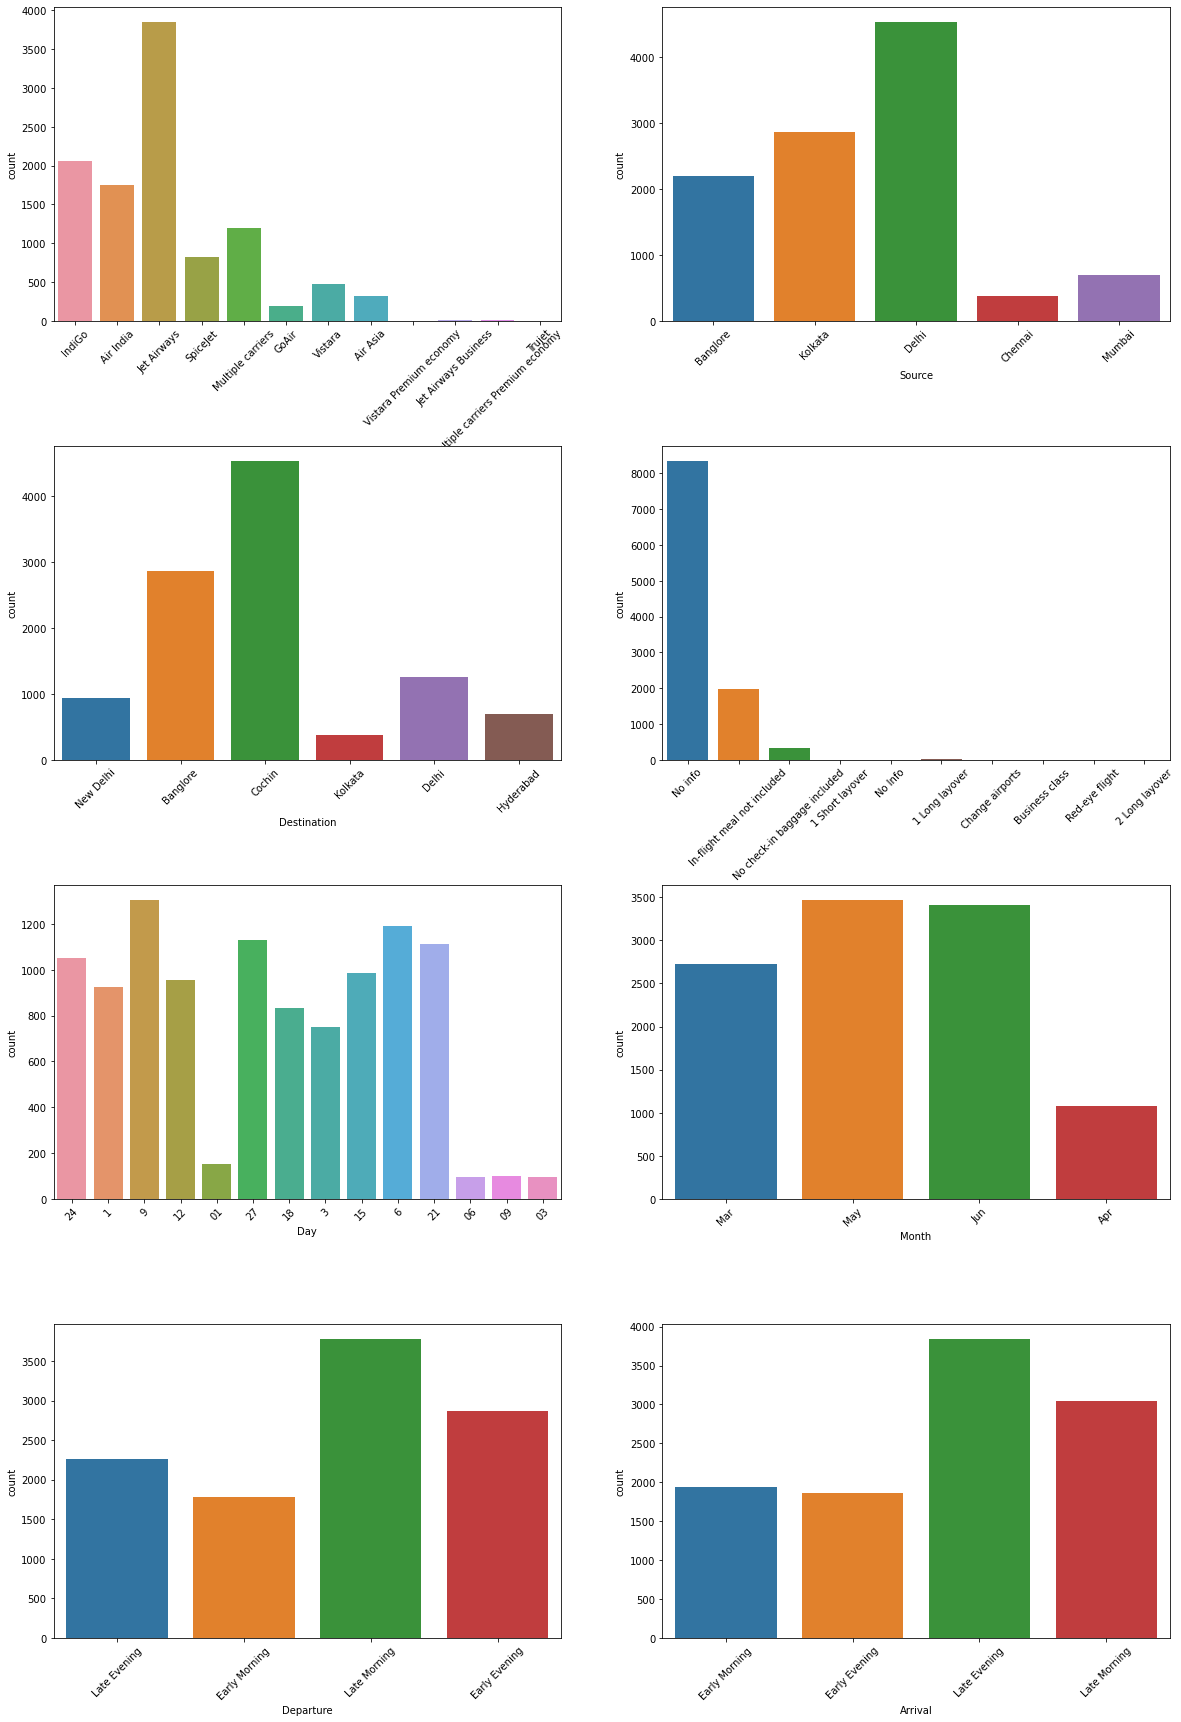

In [59]:
fig, ax = plt.subplots(4, 2, figsize=(20, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(data = df, x = categorical_features[variable], ax=subplot)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

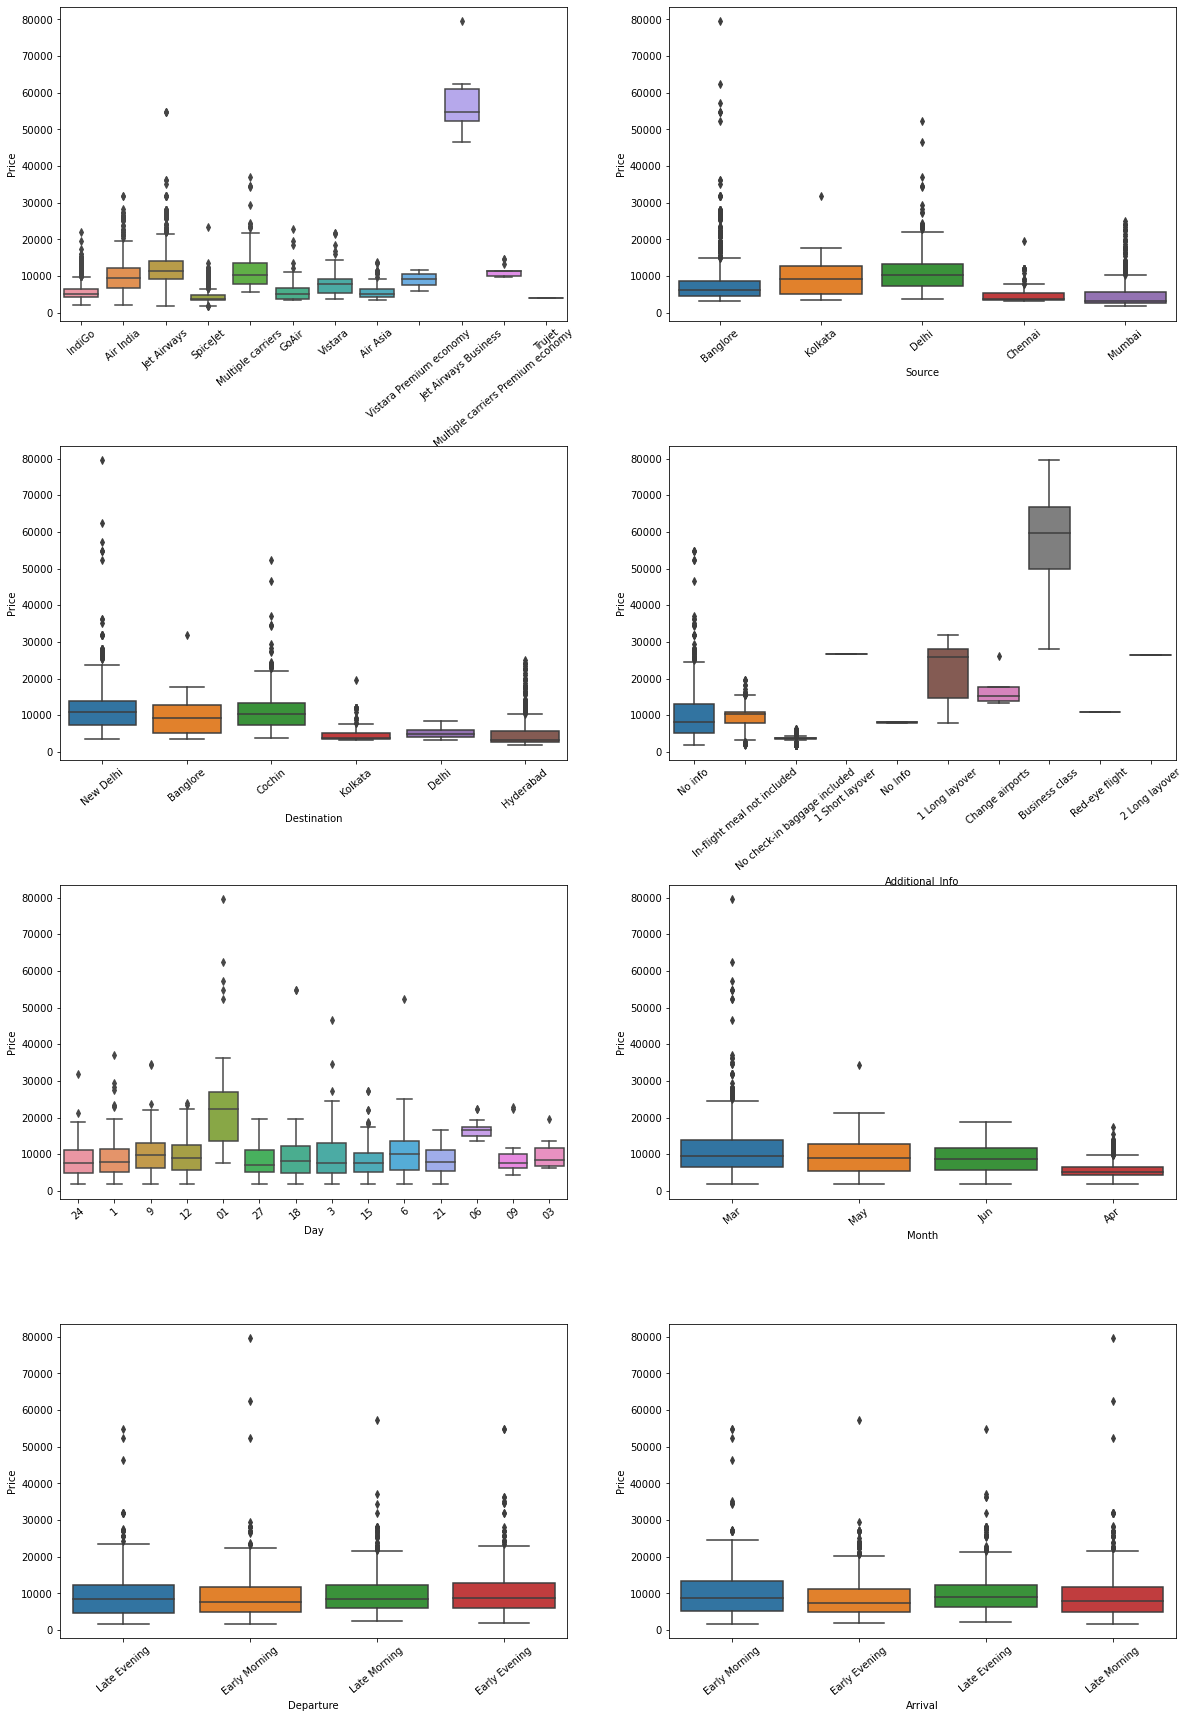

In [60]:
fig, ax = plt.subplots(4, 2, figsize=(20, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='Price', data=df, ax=subplot)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    for label in subplot.get_xticklabels():
        label.set_rotation(40)

In [61]:
df['Additional_Info'].replace(['1 Long layover', 'Change airports', 'Business class', 'No Info','2 Long layover','1 Short layover','Red-eye flight'],'No info', inplace = True)

In [62]:
df.describe()

,Price,Duration_minutes,Total stops
count,10683.000000,10683.000000,10682.000000
mean,9087.064121,492.124403,0.824190
std,4611.359167,383.070347,0.675229
min,1759.000000,0.000000,0.000000
25%,5277.000000,165.000000,0.000000
50%,8372.000000,380.000000,1.000000
75%,12373.000000,755.000000,1.000000
max,79512.000000,1435.000000,4.000000


In [63]:
df[df['Price'] > 20000].count()

Airline             148
Source              148
Destination         148
Route               148
Additional_Info     148
Price               148
Day                 148
Month               148
Departure           148
Arrival             148
Duration_minutes    148
Total stops         148
dtype: int64

In [64]:
df = df[~(df['Price'] >= 20000)]  

In [65]:
df['Price'].skew()

0.32802698814738934

Out of more than 10000 samples, only 148 are above rs.20000 for price. 

### Encoding the categorical data

In [66]:
categorical_features

,Airline,Source,Destination,Additional_Info,Day,Month,Departure,Arrival
0,IndiGo,Banglore,New Delhi,No info,24,Mar,Late Evening,Early Morning
1,Air India,Kolkata,Banglore,No info,1,May,Early Morning,Early Evening
2,Jet Airways,Delhi,Cochin,No info,9,Jun,Late Morning,Early Morning
3,IndiGo,Kolkata,Banglore,No info,12,May,Early Evening,Late Evening
4,IndiGo,Banglore,New Delhi,No info,01,Mar,Early Evening,Late Evening
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,9,Apr,Late Evening,Late Evening
10679,Air India,Kolkata,Banglore,No info,27,Apr,Late Evening,Late Evening
10680,Jet Airways,Banglore,Delhi,No info,27,Apr,Late Morning,Late Morning
10681,Vistara,Banglore,New Delhi,No info,01,Mar,Late Morning,Early Evening


In [67]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['Airline','Source','Destination','Additional_Info','Day','Month','Departure','Arrival'], handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [68]:
#Fit and transform Data
data_encoded = encoder.fit_transform(df)
data_encoded

,Airline_IndiGo,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Multiple carriers Premium economy,...,Departure_Late Evening,Departure_Early Morning,Departure_Late Morning,Departure_Early Evening,Arrival_Early Morning,Arrival_Early Evening,Arrival_Late Evening,Arrival_Late Morning,Duration_minutes,Total stops
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,170,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,445,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1140,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,325,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,155,0.0
10680,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,180,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,160,0.0


In [69]:
data_encoded.columns

Index(['Airline_IndiGo', 'Airline_Air India', 'Airline_Jet Airways',
       'Airline_SpiceJet', 'Airline_Multiple carriers', 'Airline_GoAir',
       'Airline_Vistara', 'Airline_Air Asia',
       'Airline_Vistara Premium economy',
       'Airline_Multiple carriers Premium economy', 'Airline_Trujet',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_New Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Delhi',
       'Destination_Hyderabad', 'Route', 'Additional_Info_No info',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included', 'Price', 'Day_24',
       'Day_1', 'Day_9', 'Day_12', 'Day_01', 'Day_27', 'Day_18', 'Day_3',
       'Day_15', 'Day_6', 'Day_21', 'Day_06', 'Day_09', 'Day_03', 'Month_Mar',
       'Month_May', 'Month_Jun', 'Month_Apr', 'Departure_Late Evening',
       'Departure_Early Morning', 'Departure_Late Morni

In [70]:
final_df = data_encoded.copy()

In [71]:
final_df = final_df.dropna()

In [72]:
final_df.head()

,Airline_IndiGo,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Multiple carriers Premium economy,...,Departure_Late Evening,Departure_Early Morning,Departure_Late Morning,Departure_Early Evening,Arrival_Early Morning,Arrival_Early Evening,Arrival_Late Evening,Arrival_Late Morning,Duration_minutes,Total stops
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,170,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,445,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1140,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,325,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,285,1.0


In [73]:
X = final_df.drop(['Price','Route'],axis=1)
y = final_df['Price']

In [74]:
X.columns

Index(['Airline_IndiGo', 'Airline_Air India', 'Airline_Jet Airways',
       'Airline_SpiceJet', 'Airline_Multiple carriers', 'Airline_GoAir',
       'Airline_Vistara', 'Airline_Air Asia',
       'Airline_Vistara Premium economy',
       'Airline_Multiple carriers Premium economy', 'Airline_Trujet',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_New Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Delhi',
       'Destination_Hyderabad', 'Additional_Info_No info',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included', 'Day_24', 'Day_1',
       'Day_9', 'Day_12', 'Day_01', 'Day_27', 'Day_18', 'Day_3', 'Day_15',
       'Day_6', 'Day_21', 'Day_06', 'Day_09', 'Day_03', 'Month_Mar',
       'Month_May', 'Month_Jun', 'Month_Apr', 'Departure_Late Evening',
       'Departure_Early Morning', 'Departure_Late Morning',
       'Depar

In [75]:
final_df.columns

Index(['Airline_IndiGo', 'Airline_Air India', 'Airline_Jet Airways',
       'Airline_SpiceJet', 'Airline_Multiple carriers', 'Airline_GoAir',
       'Airline_Vistara', 'Airline_Air Asia',
       'Airline_Vistara Premium economy',
       'Airline_Multiple carriers Premium economy', 'Airline_Trujet',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_New Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Delhi',
       'Destination_Hyderabad', 'Route', 'Additional_Info_No info',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included', 'Price', 'Day_24',
       'Day_1', 'Day_9', 'Day_12', 'Day_01', 'Day_27', 'Day_18', 'Day_3',
       'Day_15', 'Day_6', 'Day_21', 'Day_06', 'Day_09', 'Day_03', 'Month_Mar',
       'Month_May', 'Month_Jun', 'Month_Apr', 'Departure_Late Evening',
       'Departure_Early Morning', 'Departure_Late Morni

## Selection of best models

In [76]:
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import sklearn.metrics as sm

# Importing required libraries

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (8427, 53)
Y Train Shape  (8427,)
X Test Shape  (2107, 53)
Y Test Shape  (2107,)


### Decision tree regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.8580889679981658

In [79]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())

0.8596248294799569


In [80]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 745.56
Mean squared error = 2315574.31
Median absolute error = 185.0
Explain variance score = 0.86
R2 score = 0.86


### Random forest regression

In [81]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9101645345819037

In [82]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.907738026598677


In [83]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 669.84
Mean squared error = 1465852.89
Median absolute error = 289.17
Explain variance score = 0.91
R2 score = 0.91


### Support vector regression

In [84]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.16394965875888678

In [85]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

0.14893343411973992


In [86]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_svr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_svr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_svr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_svr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_svr), 2))

Mean absolute error = 3018.73
Mean squared error = 13641904.13
Median absolute error = 2671.36
Explain variance score = 0.19
R2 score = 0.16


### Lasso regression

In [87]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
y_pred_lasso = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)

0.7375749401189672

In [88]:
scr = cross_val_score(lassoReg, X,y, cv=5)
print(scr.mean())

0.7450977385732713


In [89]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lasso), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lasso), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lasso), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lasso), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lasso), 2))

Mean absolute error = 1575.29
Mean squared error = 4282011.9
Median absolute error = 1246.32
Explain variance score = 0.74
R2 score = 0.74


### Linear regression

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True).fit(X, y)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.7403720403937982

In [91]:
cr = cross_val_score(lr, X,y, cv=5)
print(scr.mean())

0.7450977385732713


In [92]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lr), 2))

Mean absolute error = 1569.47
Mean squared error = 4236371.37
Median absolute error = 1230.0
Explain variance score = 0.74
R2 score = 0.74


### Hyper paramter tuning

Random forest regressor is our best model, I will use hyperparameter tuning in that.

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [95]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [96]:
GCV.fit(X_train,y_train)

 GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})



In [97]:
GCV.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}



In [98]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =3, n_estimators = 100, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9123812817417802

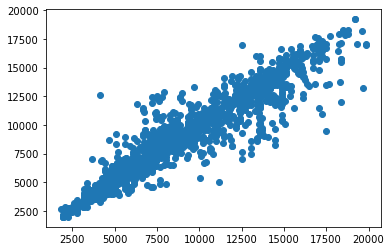

In [99]:
plt.scatter(y_test,pred)

<AxesSubplot:xlabel='Price', ylabel='Density'>

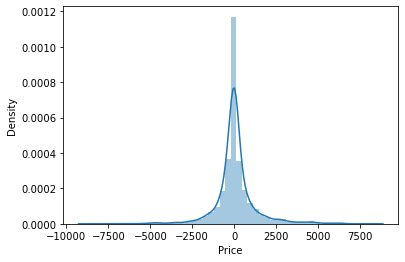

In [100]:
sns.distplot(y_test-pred)

We can observe that most of our data fits to as how we would expect.

### Saving the model

In [101]:
import joblib
joblib.dump(mod,"AirfarePrice.pkl")

['AirfarePrice.pkl']